## Introduction to Network Analysis

## Basics of NetworkX

### Important Note
Most Python distributions available in 2018 and later include version 2.0 or higher of NetworkX. Version 2.0 of NetworkX introduced several significant changes. This version and higher versions behave differently from previous versions in certain areas.

For this video...

No changes to the code are necessary. However, some of the data types of the returned objects have changed.
Previously, G.nodes() returned a list object, while now it returns a NodeView object. (See 1:46 in the video.)
Previously, G.edges() returned a list object, while now it returns an EdgeView object. (See 3:35 in the video.)

In [1]:
import networkx as nx

In [2]:
G=nx.Graph()

In [4]:
G.add_node(1)

In [6]:
G.add_nodes_from([2,3])

In [7]:
G.add_nodes_from(["u","v"])

In [10]:
G.nodes()

NodeView((1, 2, 3, 'u', 'v'))

In [11]:
G.add_edge(1,2)

In [12]:
G.add_edge("u","v")

In [13]:
G.add_edges_from([(1,3),(1,4),(1,5),(1,6)])

In [14]:
G.add_edge("u","w")

In [15]:
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')])

In [16]:
G.remove_node(2)

In [17]:
G.nodes()

NodeView((1, 3, 'u', 'v', 4, 5, 6, 'w'))

In [18]:
G.remove_nodes_from([4,5])

In [19]:
G.nodes()

NodeView((1, 3, 'u', 'v', 6, 'w'))

In [20]:
G.remove_edge(1,3)

In [21]:
G.edges()

EdgeView([(1, 6), ('u', 'v'), ('u', 'w')])

In [22]:
G.remove_edges_from([(1,2),("u","v")])

In [23]:
G.edges()

EdgeView([(1, 6), ('u', 'w')])

In [24]:
G.number_of_nodes()

6

In [25]:
G.number_of_edges()

2

### Exercise

In [26]:
G = nx.Graph()
G.add_nodes_from(1,2,3,4)
G.add_edges_from((1,2),(3,4))
G.number_of_nodes(), G.number_of_edges()


TypeError: add_nodes_from() takes 2 positional arguments but 5 were given

## Graph Visualization

### Important Note
Most Python distributions available in 2018 and later include version 2.0 or higher of NetworkX. Version 2.0 of NetworkX introduced several significant changes. This version and higher versions behave differently from previous versions in certain areas.

For this video...

Previously, G.degree() returned a Python dictionary, while now it returns a DegreeView object, which is similar to a dictionary. (See 2:23-4:03 in the video.) No code changes are necessary.

In [27]:
G=nx.karate_club_graph()

In [29]:
import matplotlib.pyplot as plt

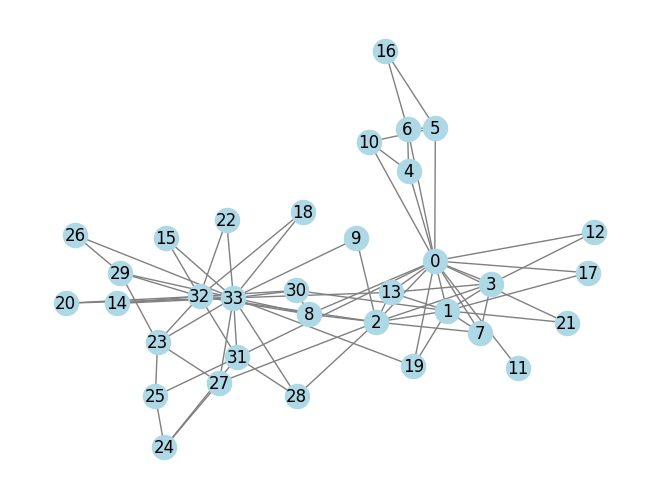

In [31]:
nx.draw(G,with_labels=True,node_color="lightblue",edge_color="grey")
plt.savefig("karate_graph.pdf")

In [32]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [33]:
G.degree()[33]

17

In [34]:
G.degree(33)

17

In [35]:
G.number_of_nodes(), G.number_of_edges()

(34, 78)

In [36]:
G.degree(33) is G.degree()[33]

True

## Random Graphs

In [37]:
from scipy.stats import bernoulli

In [38]:
bernoulli.rvs(p=0.2)

0

In [39]:
N=20;p=0.2

In [46]:
def er_graph(N,p):
    G=nx.Graph()
    G.add_nodes_from(range(N))
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1 < node2 and bernoulli.rvs(p=p):
                G.add_edge(node1,node2)
    return G

In [44]:
G.number_of_nodes(), G.number_of_edges()

(20, 33)

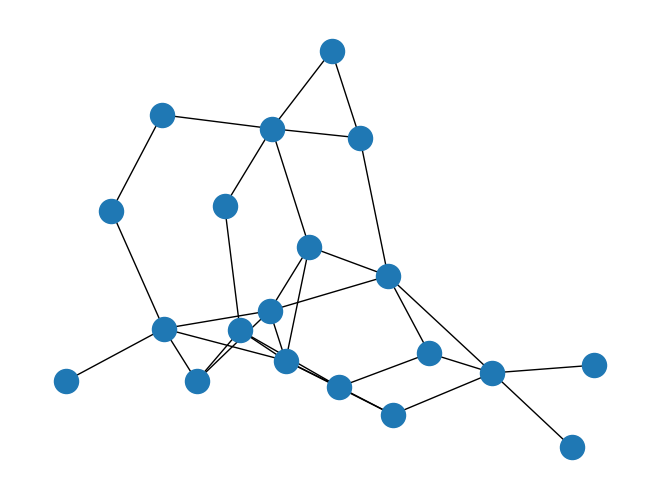

In [45]:
nx.draw(G)

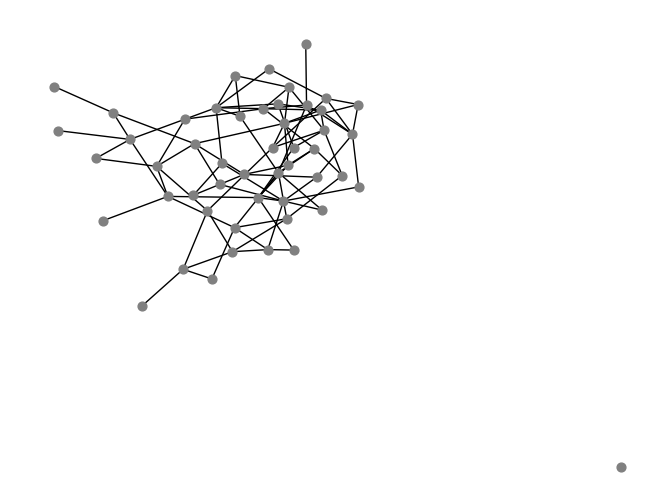

In [48]:
nx.draw(er_graph(50,0.08),node_size=40,node_color="gray")
plt.savefig("er1.pdf")

## Plotting the Degree Distribution

### Important Note
Most Python distributions available in 2018 and later include version 2.0 or higher of NetworkX. Version 2.0 of NetworkX introduced several significant changes. This version and higher versions behave differently from previous versions in certain areas.

In [58]:
def plot_degree_distribution(G):
    plt.hist(list(dict(G.degree()).values()), histtype="step")
    plt.xlabel("Degree k")
    plt.ylabel("$P(K)$")
    plt.title("Degree distribution")

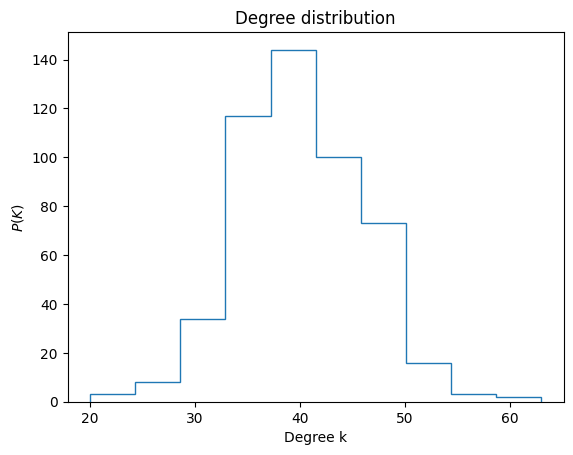

In [62]:
G1=er_graph(500,0.08)
plot_degree_distribution(G1)
plt.savefig("hist1.pdf")

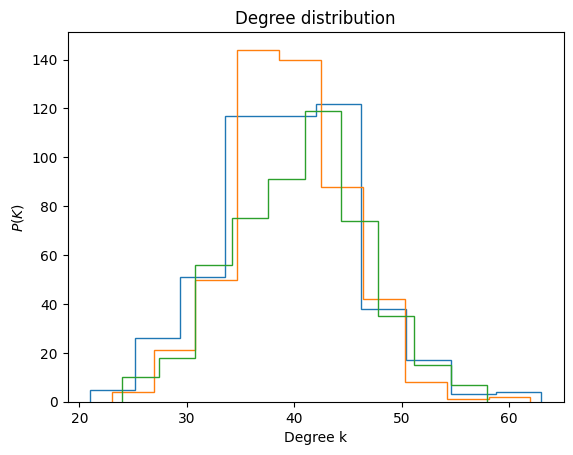

In [63]:
G1=er_graph(500,0.08)
plot_degree_distribution(G1)
G2=er_graph(500,0.08)
plot_degree_distribution(G2)
G3=er_graph(500,0.08)
plot_degree_distribution(G3)
plt.savefig("hist_3.pdf")

### Exercise

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

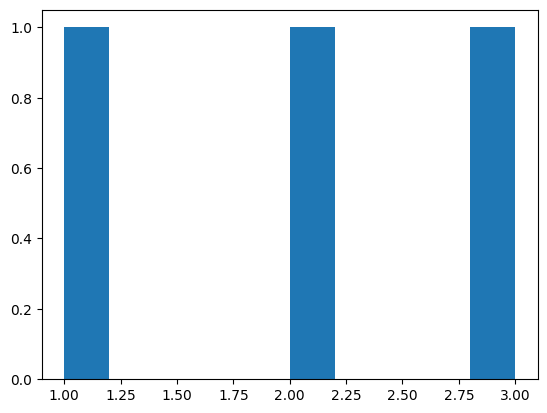

In [64]:
D = {1:1, 2:2, 3:3}
plt.hist(D)

In [ ]:
degree_sequence = [d for n, d in G.degree()]
plt.hist(degree_sequence, histtype="step")

## Descriptive Statistics of Empirical Social Networks

### Important Note
Most Python distributions available in 2018 and later include version 2.0 or higher of NetworkX. Version 2.0 of NetworkX introduced several significant changes. This version and higher versions behave differently from previous versions in certain areas.

In [65]:
import numpy as np

In [66]:
A1=np.loadtxt("adj_allVillageRelationships_vilno_1.csv",delimiter=",")
A2=np.loadtxt("adj_allVillageRelationships_vilno_2.csv",delimiter=",")

In [68]:
G1=nx.to_networkx_graph(A1)
G2=nx.to_networkx_graph(A2)

In [69]:
def basic_net_stats(G):
    print("Number of nodes: %d"%G.number_of_nodes())
    print("Number of edges: %d" %G.number_of_edges())
    degree_sequence = [d for n, d in G.degree()]
    print("Average degree: %.2f" % np.mean(degree_sequence)) 

In [71]:
basic_net_stats(G1)

Number of nodes: 843
Number of edges: 3405
Average degree: 8.08


In [72]:
basic_net_stats(G2)

Number of nodes: 877
Number of edges: 3063
Average degree: 6.99


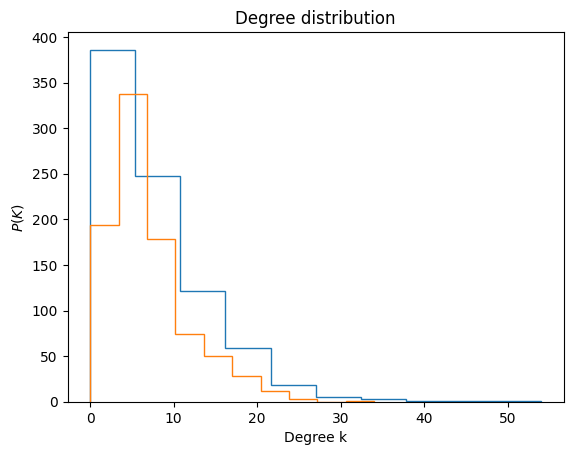

In [73]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)
plt.savefig("village_hist.pdf")

## Finding the Largest Connected Component

In [75]:
gen=(G1.subgraph(c) for c in nx.connected_components(G1))

In [76]:
g=gen.__next__()

In [77]:
type(g)

networkx.classes.graph.Graph

In [78]:
g.number_of_nodes()

825

In [79]:
len(gen.__next__())

3

In [81]:
len(G1)

843

In [82]:
G1.number_of_nodes()

843

In [83]:
len(gen.__next__())

4

In [84]:
len(gen.__next__())

2

In [85]:
len(gen.__next__())

4

In [86]:
G1_LCC=max((G1.subgraph(c) for c in nx.connected_components(G1)),key=len)
G2_LCC=max((G2.subgraph(c) for c in nx.connected_components(G2)),key=len)

len(G1_LCC)

825

In [87]:
G1_LCC.number_of_nodes()

825

In [88]:
len(G2_LCC)

810

In [89]:
G1_LCC.number_of_nodes()/G1.number_of_nodes()

0.9786476868327402

In [90]:
G2_LCC.number_of_nodes()/G2.number_of_nodes()

0.9236031927023945

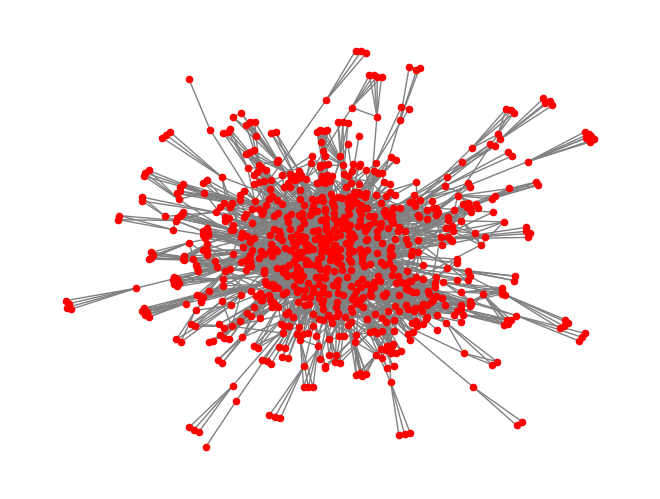

In [91]:
plt.figure()
nx.draw(G1_LCC, node_color="red", edge_color="gray", node_size=20)
plt.savefig("villlage1.pdf")

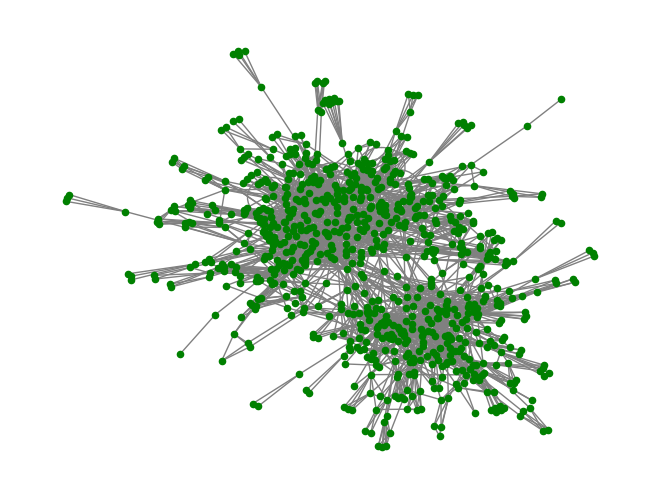

In [92]:
plt.figure()
nx.draw(G2_LCC, node_color="green", edge_color="gray", node_size=20)
plt.savefig("villlage2.pdf")